In [2]:
import numpy as np
import timeit
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [19]:
df=pd.read_csv("MCI_2014_to_2019.csv")
df['Total'] = 1
df.head()

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,...,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Long,Lat,ObjectId,Total
0,-79.405228,43.656982,7801,GO-20152165447,2015-12-18T03:58:00.000Z,2015-12-18T03:59:00.000Z,Commercial,1430,100,Assault,...,Friday,3,Assault,D14,79,University (79),-79.405228,43.656982,7001,1
1,-79.307907,43.778732,7802,GO-20151417245,2015-08-15T21:45:00.000Z,2015-08-17T22:11:00.000Z,Commercial,1430,100,Assault,...,Saturday,21,Assault,D42,118,Tam O'Shanter-Sullivan (118),-79.307907,43.778732,7002,1
2,-79.225029,43.765942,7803,GO-20151421107,2015-08-16T16:00:00.000Z,2015-08-18T14:40:00.000Z,Apartment,2120,200,B&E,...,Sunday,16,Break and Enter,D43,137,Woburn (137),-79.225029,43.765942,7003,1
3,-79.140823,43.778648,7804,GO-20152167714,2015-11-26T13:00:00.000Z,2015-12-18T13:38:00.000Z,Other,2120,200,B&E,...,Thursday,13,Break and Enter,D43,133,Centennial Scarborough (133),-79.140823,43.778648,7004,1
4,-79.288361,43.691235,7805,GO-20152169954,2015-12-18T19:50:00.000Z,2015-12-18T19:55:00.000Z,Commercial,1430,100,Assault,...,Friday,19,Assault,D55,61,Taylor-Massey (61),-79.288361,43.691235,7005,1


In [20]:
df.dtypes
df.dropna()

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,...,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Long,Lat,ObjectId,Total
0,-79.405228,43.656982,7801,GO-20152165447,2015-12-18T03:58:00.000Z,2015-12-18T03:59:00.000Z,Commercial,1430,100,Assault,...,Friday,3,Assault,D14,79,University (79),-79.405228,43.656982,7001,1
1,-79.307907,43.778732,7802,GO-20151417245,2015-08-15T21:45:00.000Z,2015-08-17T22:11:00.000Z,Commercial,1430,100,Assault,...,Saturday,21,Assault,D42,118,Tam O'Shanter-Sullivan (118),-79.307907,43.778732,7002,1
2,-79.225029,43.765942,7803,GO-20151421107,2015-08-16T16:00:00.000Z,2015-08-18T14:40:00.000Z,Apartment,2120,200,B&E,...,Sunday,16,Break and Enter,D43,137,Woburn (137),-79.225029,43.765942,7003,1
3,-79.140823,43.778648,7804,GO-20152167714,2015-11-26T13:00:00.000Z,2015-12-18T13:38:00.000Z,Other,2120,200,B&E,...,Thursday,13,Break and Enter,D43,133,Centennial Scarborough (133),-79.140823,43.778648,7004,1
4,-79.288361,43.691235,7805,GO-20152169954,2015-12-18T19:50:00.000Z,2015-12-18T19:55:00.000Z,Commercial,1430,100,Assault,...,Friday,19,Assault,D55,61,Taylor-Massey (61),-79.288361,43.691235,7005,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206430,-79.563538,43.682293,205896,GO-2019336030,2019-02-21T23:00:00.000Z,2019-02-22T13:27:00.000Z,Outside,2135,210,Theft Of Motor Vehicle,...,Thursday,23,Auto Theft,D23,7,Willowridge-Martingrove-Richview (7),-79.563538,43.682293,205996,1
206431,-79.348709,43.656227,205897,GO-2019336549,2019-02-21T00:01:00.000Z,2019-02-22T14:45:00.000Z,Commercial,2135,210,Theft Of Motor Vehicle,...,Thursday,0,Auto Theft,D55,70,South Riverdale (70),-79.348709,43.656227,205997,1
206432,-79.598869,43.743992,205898,GO-2019187512,2019-01-30T12:30:00.000Z,2019-01-30T12:47:00.000Z,House,2135,210,Theft Of Motor Vehicle,...,Wednesday,12,Auto Theft,D23,1,West Humber-Clairville (1),-79.598869,43.743992,205998,1
206433,-79.348709,43.656227,205899,GO-2019336549,2019-02-21T00:01:00.000Z,2019-02-22T14:45:00.000Z,Commercial,2135,210,Theft Of Motor Vehicle,...,Thursday,0,Auto Theft,D55,70,South Riverdale (70),-79.348709,43.656227,205999,1


In [21]:
print('Original Data Size after dropping Duplicates')
df = df.drop_duplicates(subset='event_unique_id',keep='first')
df.shape

Original Data Size after dropping Duplicates


(179813, 30)

In [22]:
drop_colmns = ['X', 'Y', 'Index_', 'reporteddate', 'reportedyear', 'reportedmonth', 'reportedday', 'reporteddayofyear',
               'reporteddayofweek', 'reportedhour', 'Hood_ID', 'ucr_code', 'ucr_ext', 'Division', 'occurrencedayofyear']
df_dropped = df.drop(columns=drop_colmns)


In [23]:
df_dropped.dtypes

event_unique_id         object
occurrencedate          object
premisetype             object
offence                 object
occurrenceyear         float64
occurrencemonth         object
occurrenceday          float64
occurrencedayofweek     object
occurrencehour           int64
MCI                     object
Neighbourhood           object
Long                   float64
Lat                    float64
ObjectId                 int64
Total                    int64
dtype: object

In [ ]:
assault = df[df['MCI'] == 'Assault']
assault_types = assault.groupby('offence', as_index=False).size()
print(assault_types)
ct = assault_types.sort_values(by='size', ascending=False)


                           offence   size
0      Administering Noxious Thing    204
1    Aggravated Aslt Peace Officer      8
2               Aggravated Assault   1342
3   Aggravated Assault Avails Pros     10
4   Air Gun Or Pistol: Bodily Harm     13
5                          Assault  66173
6      Assault - Force/Thrt/Impede    159
7   Assault - Resist/ Prevent Seiz   1925
8              Assault Bodily Harm   4052
9            Assault Peace Officer   2475
10   Assault Peace Officer Wpn/Cbh    144
11             Assault With Weapon  13625
12     Crim Negligence Bodily Harm     66
13  Disarming Peace/Public Officer     48
14  Discharge Firearm - Recklessly    787
15   Discharge Firearm With Intent    995
16              Pointing A Firearm    515
17  Traps Likely Cause Bodily Harm      1
18  Unlawfully Causing Bodily Harm     13
19  Use Firearm / Immit Commit Off     52


In [50]:
df_grouped = df_dropped.groupby(df_dropped['occurrenceyear'])

In [51]:
#Analysis by year
df_2015 = df_grouped.get_group(2015)
df_2016 = df_grouped.get_group(2016)
df_2017 = df_grouped.get_group(2017)

In [52]:
df_2015_grouped = df_2015.groupby(df_2015['MCI']).count()
df_2016_grouped = df_2016.groupby(df_2016['MCI']).count()
df_2017_grouped = df_2017.groupby(df_2017['MCI']).count()

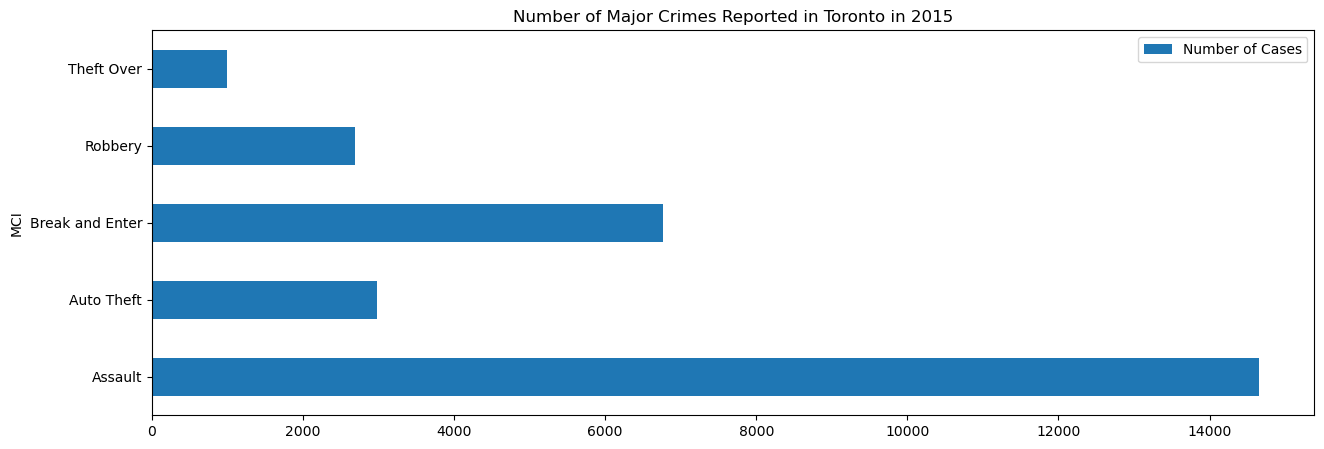

In [53]:
plot = df_2015_grouped.iloc[:,0]
plot = pd.DataFrame(plot)
plot.columns = ['Number of Cases']
ax = plot.plot(kind='barh',figsize=(15,5),title='Number of Major Crimes Reported in Toronto in 2015')

In [54]:
df.head()

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,...,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Long,Lat,ObjectId,Total
0,-79.405228,43.656982,7801,GO-20152165447,2015-12-18T03:58:00.000Z,2015-12-18T03:59:00.000Z,Commercial,1430,100,Assault,...,Friday,3,Assault,D14,79,University (79),-79.405228,43.656982,7001,1
1,-79.307907,43.778732,7802,GO-20151417245,2015-08-15T21:45:00.000Z,2015-08-17T22:11:00.000Z,Commercial,1430,100,Assault,...,Saturday,21,Assault,D42,118,Tam O'Shanter-Sullivan (118),-79.307907,43.778732,7002,1
2,-79.225029,43.765942,7803,GO-20151421107,2015-08-16T16:00:00.000Z,2015-08-18T14:40:00.000Z,Apartment,2120,200,B&E,...,Sunday,16,Break and Enter,D43,137,Woburn (137),-79.225029,43.765942,7003,1
3,-79.140823,43.778648,7804,GO-20152167714,2015-11-26T13:00:00.000Z,2015-12-18T13:38:00.000Z,Other,2120,200,B&E,...,Thursday,13,Break and Enter,D43,133,Centennial Scarborough (133),-79.140823,43.778648,7004,1
4,-79.288361,43.691235,7805,GO-20152169954,2015-12-18T19:50:00.000Z,2015-12-18T19:55:00.000Z,Commercial,1430,100,Assault,...,Friday,19,Assault,D55,61,Taylor-Massey (61),-79.288361,43.691235,7005,1


In [30]:

col_list = ['occurrenceyear',	'occurrencemonth','occurrenceday','occurrencedayofyear','occurrencedayofweek','occurrencehour','MCI',	'Division',	'Hood_ID','premisetype']


df2 = df[col_list]
df2 = df2[df2['occurrenceyear'] > 2013]

#Factorize dependent variable column:
crime_var = pd.factorize(df2['MCI'])
df2['MCI'] = crime_var[0]
definition_list_MCI = crime_var[1]

#factorize independent variables:
premise_var = pd.factorize(df2['premisetype'])
df2['premisetype'] = premise_var[0]
definition_list_premise = premise_var[1] 

#factorize occurenceyear:
year_var = pd.factorize(df2['occurrenceyear'])
df2['occurrenceyear'] = year_var[0]
definition_list_year = year_var[1] 

#factorize occurencemonth:
month_var = pd.factorize(df2['occurrencemonth'])
df2['occurrencemonth'] = month_var[0]
definition_list_month = month_var[1] 

#factorize occurenceday:
day_var = pd.factorize(df2['occurrenceday'])
df2['occurenceday'] = day_var[0]
definition_list_day = day_var[1] 

#factorize occurencedayofweek:
dayweek_var = pd.factorize(df2['occurrencedayofweek'])
df2['occurrencedayofweek'] = dayweek_var[0]
definition_list_day = dayweek_var[1] 

#factorize division:
division_var = pd.factorize(df2['Division'])
df2['Division'] = division_var[0]
definition_list_division = division_var[1] 

#factorize HOOD_ID:
hood_var = pd.factorize(df2['Hood_ID'])
df2['Hood_ID'] = hood_var[0]
definition_list_hood = hood_var[1] 

#factorize occurencehour:
hour_var = pd.factorize(df2['occurrencehour'])
df2['occurrencehour'] = hour_var[0]
definition_list_hour = hour_var[1] 

#factorize occurencedayofyear:
dayyear_var = pd.factorize(df2['occurrencedayofyear'])
df2['occurrencedayofyear'] = dayyear_var[0]
definition_list_dayyear = dayyear_var[1]

In [31]:
df2.head()

,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,premisetype,occurenceday
0,0,0,18.0,0,0,0,0,0,0,0,0
1,0,1,15.0,1,1,1,0,1,1,0,1
2,0,1,16.0,2,2,2,1,2,2,1,2
3,0,2,26.0,3,3,3,1,2,3,2,3
4,0,0,18.0,0,0,4,0,3,4,0,0


In [56]:
x = df2.drop(['MCI'], axis=1).values
y = df2['MCI'].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=21)

# Replace sparse=False with sparse_output=False
binary_encoder = OneHotEncoder(sparse_output=False, categories='auto')
encoded_X = binary_encoder.fit_transform(x)
X_train_OH, X_test_OH, y_train_OH, y_test_OH = train_test_split(encoded_X, y, test_size=0.25, random_state=21)

classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print("Accuracy of Random Forest : ", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test, y_pred, target_names=definition_list_MCI))

Accuracy of Random Forest :  0.5839948125125775
[[18850  2599   422    58  1015]
 [ 4902  5513    49    30   222]
 [ 3082   376   338    10   421]
 [ 1084   375    40    23   124]
 [ 2795   775   208    18  1394]]
                 precision    recall  f1-score   support

        Assault       0.61      0.82      0.70     22944
Break and Enter       0.57      0.51      0.54     10716
        Robbery       0.32      0.08      0.13      4227
     Theft Over       0.17      0.01      0.03      1646
     Auto Theft       0.44      0.27      0.33      5190

       accuracy                           0.58     44723
      macro avg       0.42      0.34      0.35     44723
   weighted avg       0.54      0.58      0.54     44723



In [57]:
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
classifier.fit(X_train_OH, y_train_OH)
y_pred_OH = classifier.predict(X_test_OH)

print("Accuracy of Random Forest with OneHotEncoder : ",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test_OH, y_pred_OH)) 
print(classification_report(y_test_OH,y_pred_OH, target_names=definition_list_MCI))

Accuracy of Random Forest with OneHotEncoder :  0.5839948125125775
[[19583  2237   220    17   887]
 [ 4840  5633    23    15   205]
 [ 3276   309   263    12   367]
 [ 1162   329    23    19   113]
 [ 2915   622   133     9  1511]]
                 precision    recall  f1-score   support

        Assault       0.62      0.85      0.72     22944
Break and Enter       0.62      0.53      0.57     10716
        Robbery       0.40      0.06      0.11      4227
     Theft Over       0.26      0.01      0.02      1646
     Auto Theft       0.49      0.29      0.37      5190

       accuracy                           0.60     44723
      macro avg       0.48      0.35      0.36     44723
   weighted avg       0.57      0.60      0.56     44723



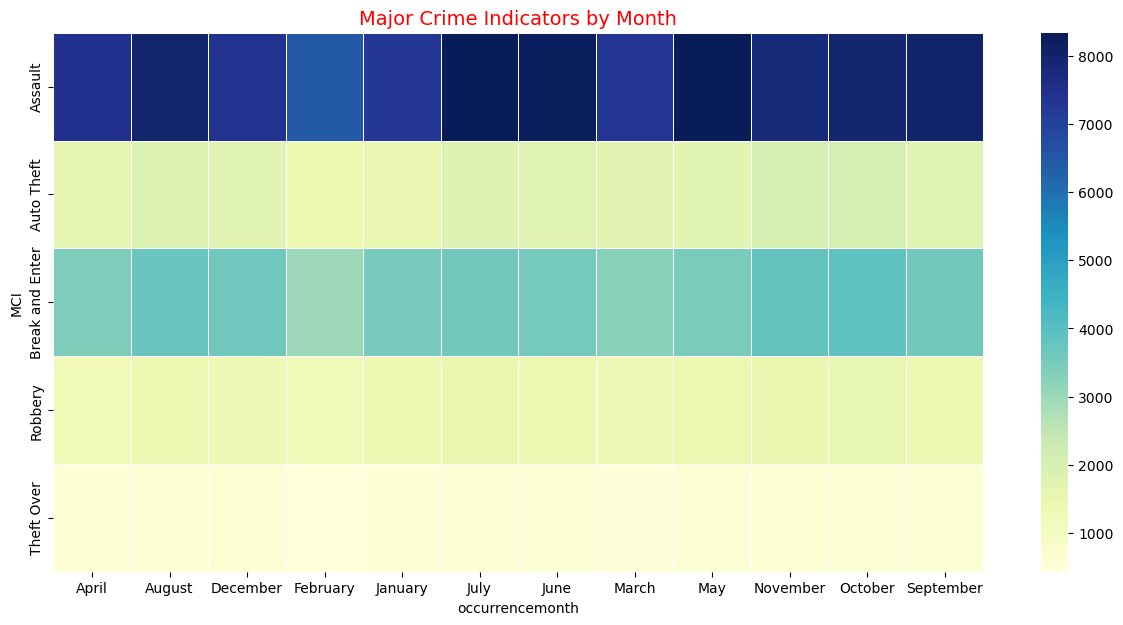

In [62]:
import seaborn as sns
mci_monthwise = df.groupby(['occurrencemonth', 'MCI'], as_index=False).agg({'Total': 'sum'})

plt.figure(figsize=(15, 7))
crime_count = mci_monthwise.pivot(index="MCI", columns="occurrencemonth", values="Total")

plt.yticks(rotation=1)
ax = sns.heatmap(crime_count, cmap="YlGnBu", linewidths=.5)
plt.title("Major Crime Indicators by Month", color='red', fontsize=14)
plt.show()

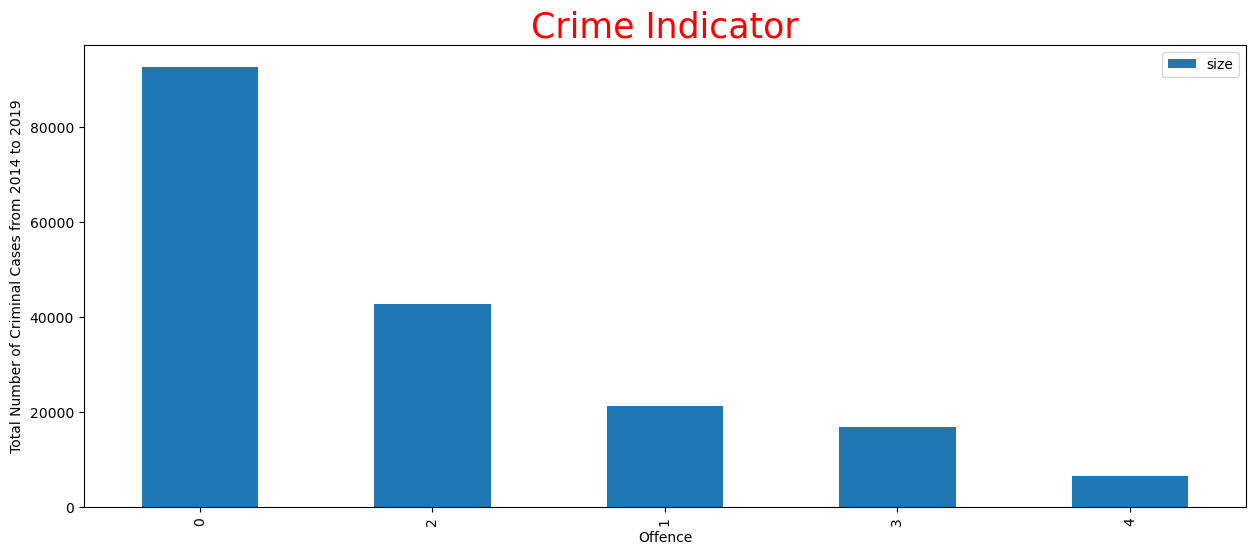

In [ ]:
major_crime_indicator = df.groupby('MCI', as_index=False).size()

fig, ax = plt.subplots(figsize=(15, 6))
ct = major_crime_indicator.sort_values(by='size', ascending=False)
ct.plot.bar(ax=ax)


ax.set_xlabel('Offence')
ax.set_ylabel('Total Number of Criminal Cases from 2014 to 2019')
ax.set_title('Crime Indicator', color='red', fontsize=25)
plt.show()

Text(0.5, 1.0, 'Crime Types by Hour of Day in Toronto')

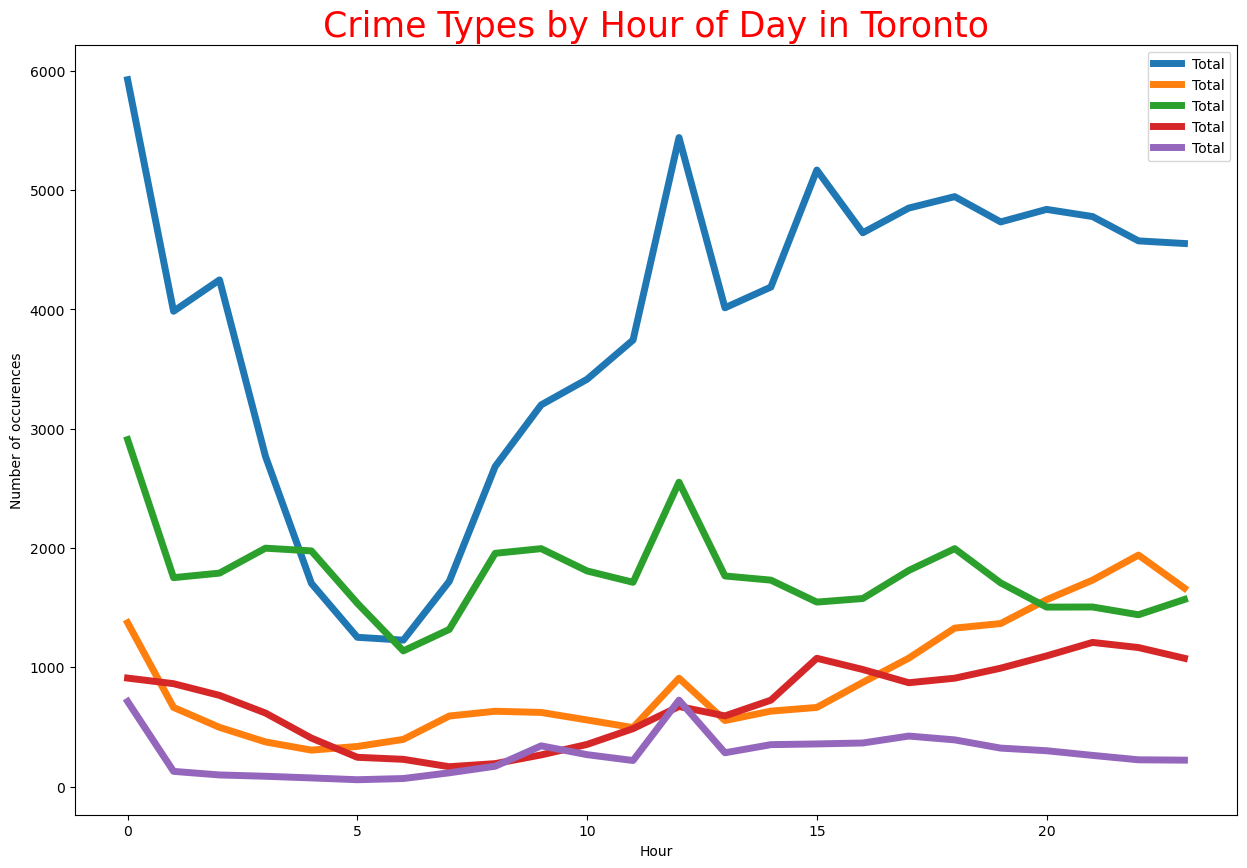

In [ ]:
hour_crime_group = df.groupby(['occurrencehour','MCI'],as_index=False).agg({'Total':'sum'})
fig, ax = plt.subplots(figsize=(15,10))
hour_crime_group.groupby('MCI').plot(x="occurrencehour", y="Total", ax=ax,linewidth=5)
ax.set_xlabel('Hour')
ax.set_ylabel('Number of occurences')
ax.set_title('Crime Types by Hour of Day in Toronto',color = 'red',fontsize=25)

In [66]:
df_g0 = df_2015.groupby(['Neighbourhood','MCI']).size().to_frame('count').reset_index()
df_g0 = df_g0.pivot(index='Neighbourhood',columns='MCI',values='count')
df_g0 = df_g0.dropna()

df_g = df_2016.groupby(['Neighbourhood','MCI']).size().to_frame('count').reset_index()
df_g = df_g.pivot(index='Neighbourhood',columns='MCI',values='count')
df_g = df_g.dropna()


df_g2 = df_2017.groupby(['Neighbourhood','MCI']).size().to_frame('count').reset_index()
df_g2 = df_g2.pivot(index='Neighbourhood',columns='MCI',values='count')
df_g2 = df_g2.dropna()

In [67]:
df_g0.head(10)

MCI,Assault,Auto Theft,Break and Enter,Robbery,Theft Over
Neighbourhood,,,,,
Agincourt North (129),57.0,26.0,51.0,29.0,5.0
Agincourt South-Malvern West (128),88.0,26.0,59.0,15.0,11.0
Alderwood (20),37.0,15.0,26.0,6.0,4.0
Annex (95),168.0,14.0,103.0,28.0,18.0
Banbury-Don Mills (42),67.0,18.0,87.0,12.0,15.0
Bathurst Manor (34),31.0,22.0,29.0,7.0,2.0
Bay Street Corridor (76),570.0,21.0,161.0,76.0,37.0
Bayview Village (52),85.0,14.0,35.0,4.0,8.0
Bayview Woods-Steeles (49),37.0,7.0,34.0,2.0,1.0


In [68]:
scaler = StandardScaler()
Sum_of_squared_distances0 = []
Sum_of_squared_distances = []
Sum_of_squared_distances2 = []

std_scale = scaler.fit(df_g0)
df_transformed0 = std_scale.transform(df_g0)
pca = PCA(n_components=3)
pca = pca.fit(df_transformed0)
X0 = pca.transform(df_transformed0)
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_transformed0)
    Sum_of_squared_distances0.append(km.inertia_)


std_scale = scaler.fit(df_g)
df_transformed = std_scale.transform(df_g)
pca = PCA(n_components=3)
pca = pca.fit(df_transformed)
X = pca.transform(df_transformed)
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_transformed)
    Sum_of_squared_distances.append(km.inertia_)
    
    
std_scale = scaler.fit(df_g2)
df_transformed2 = std_scale.transform(df_g2)
pca = PCA(n_components=3)
pca = pca.fit(df_transformed2)
X1 = pca.transform(df_transformed2)

K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_transformed2)
    Sum_of_squared_distances2.append(km.inertia_)


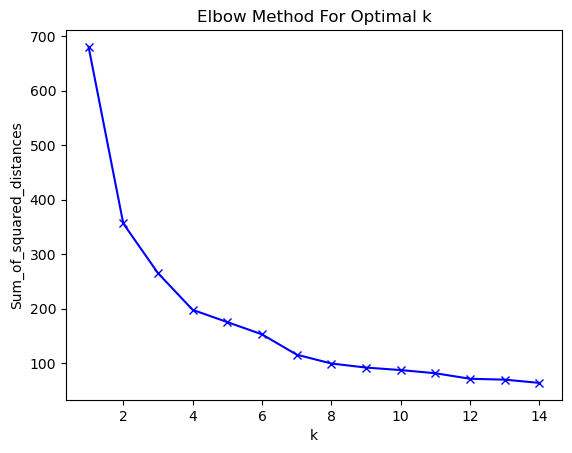

In [69]:
plt.plot(K, Sum_of_squared_distances0, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

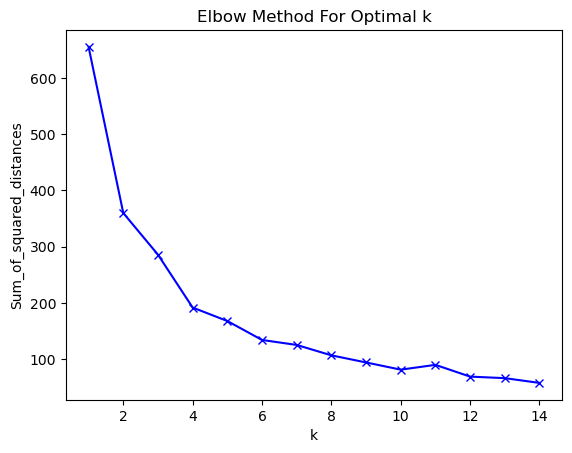

In [70]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

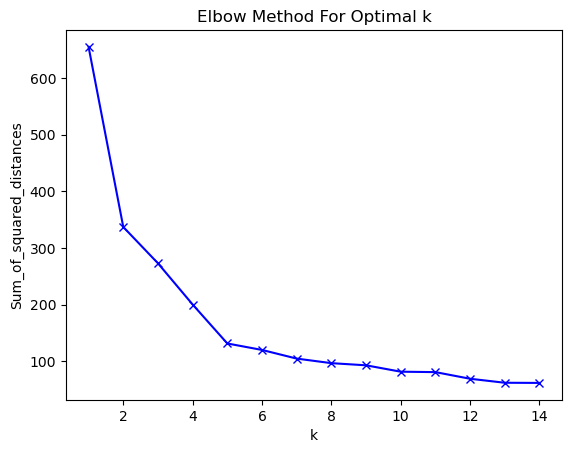

In [42]:
plt.plot(K, Sum_of_squared_distances2, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.7307306081429716
For n_clusters = 3 The average silhouette_score is : 0.5841660268070628
For n_clusters = 4 The average silhouette_score is : 0.4667462049352818
For n_clusters = 5 The average silhouette_score is : 0.4557307694638797


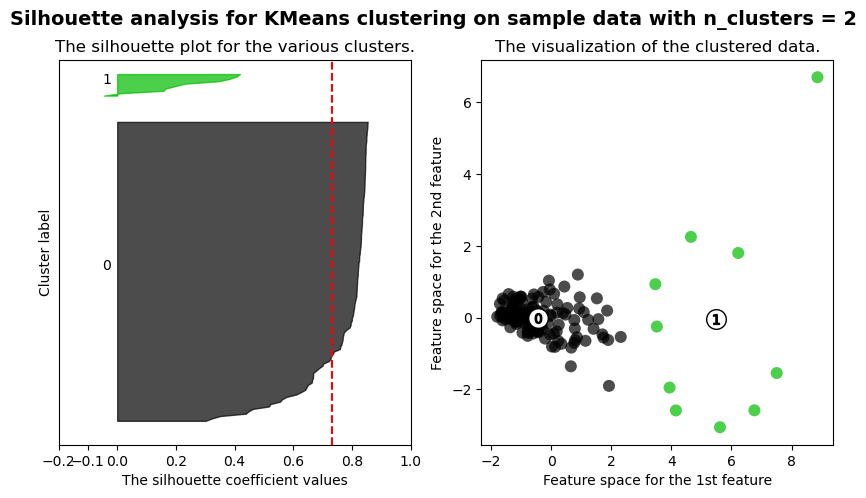

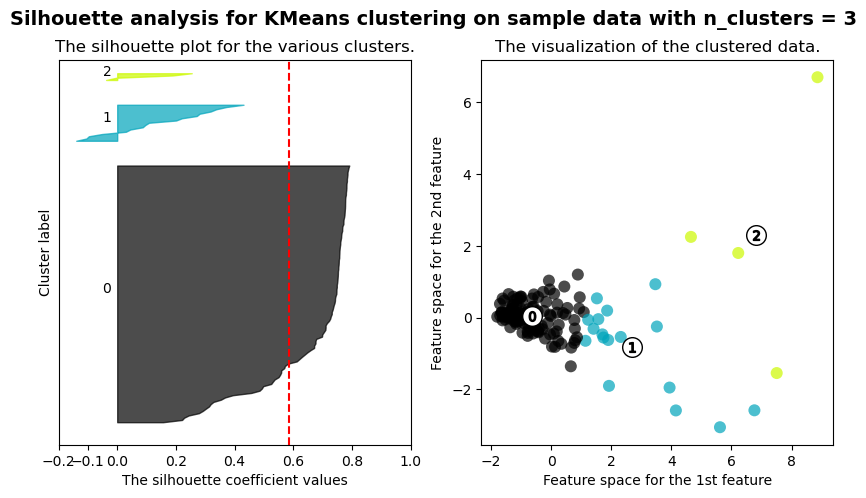

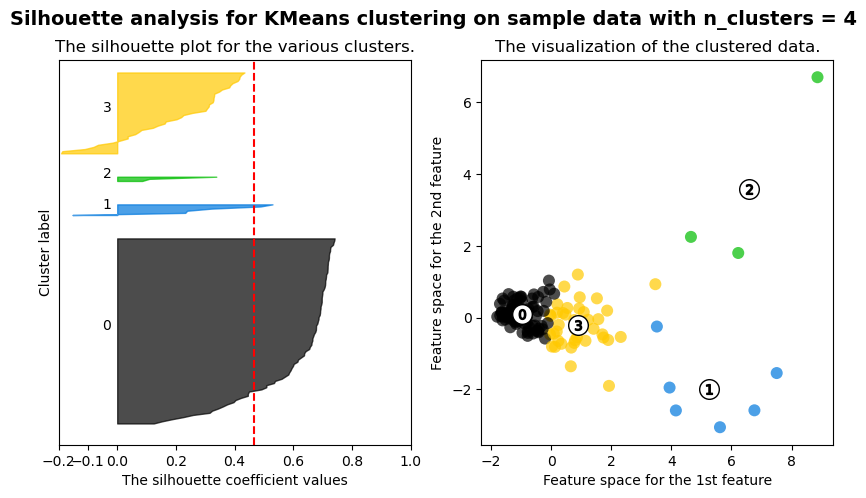

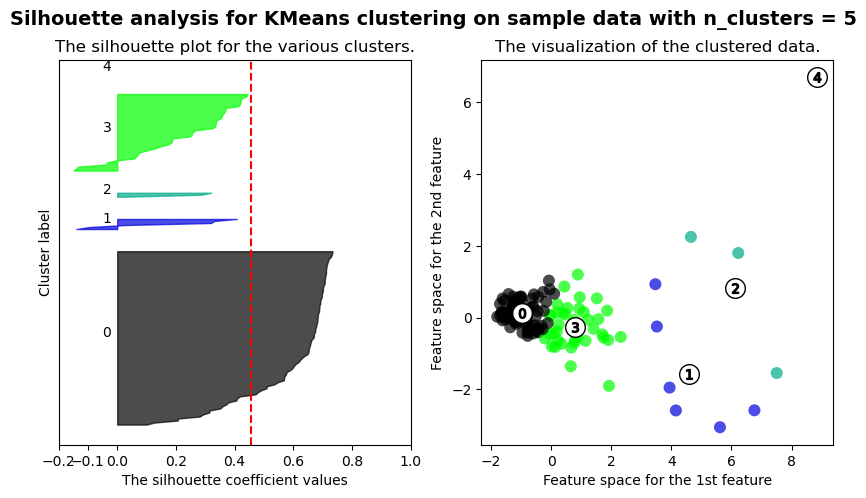

/var/folders/xl/2kbx04jd4bsf8f37wlplqdy40000gn/T/ipykernel_49948/1716111755.py:72: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()
/var/folders/xl/2kbx04jd4bsf8f37wlplqdy40000gn/T/ipykernel_49948/1716111755.py:73: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()


In [71]:
for n_clusters in range(2,6):
    kmeans = KMeans(n_clusters=n_clusters , random_state=3425)
    cluster_labels = kmeans.fit_predict(X0)
    silhouette_avg = silhouette_score(X0, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X0, cluster_labels)

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(10, 5)

   
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])


    y_lower = 10
    for i in range(n_clusters):
       # samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Computing the new y_lower
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # vertical line 
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([]) 
    ax1.set_xticks([-0.2,-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # showing the actual cluster
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X0[:, 0], X0[:, 1], marker='.', s=300, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    #  cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),fontsize=14, fontweight='bold')

plt.show()
ax1.legend()
ax2.legend()

running time is : 0.0017598750018805731


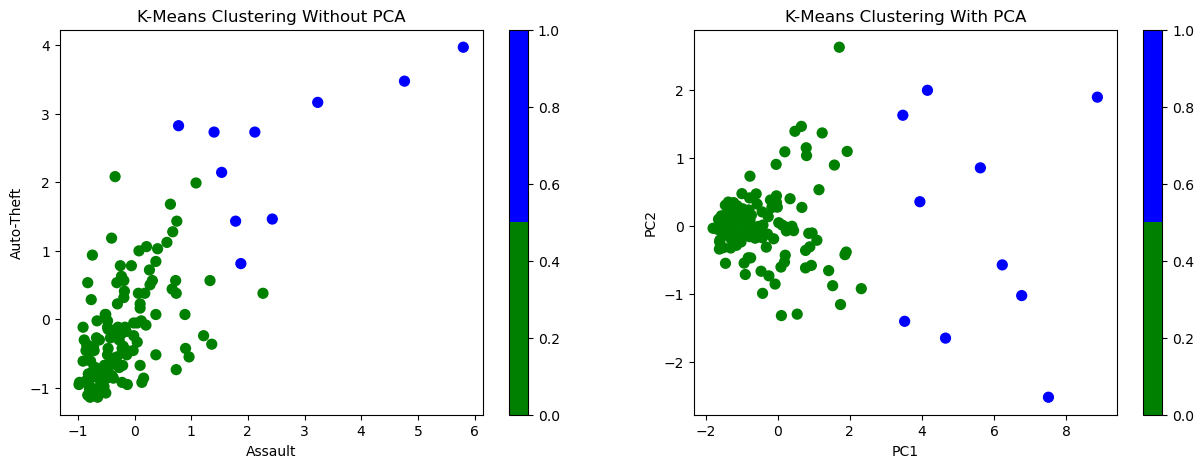

running time is : 0.001729416999296518


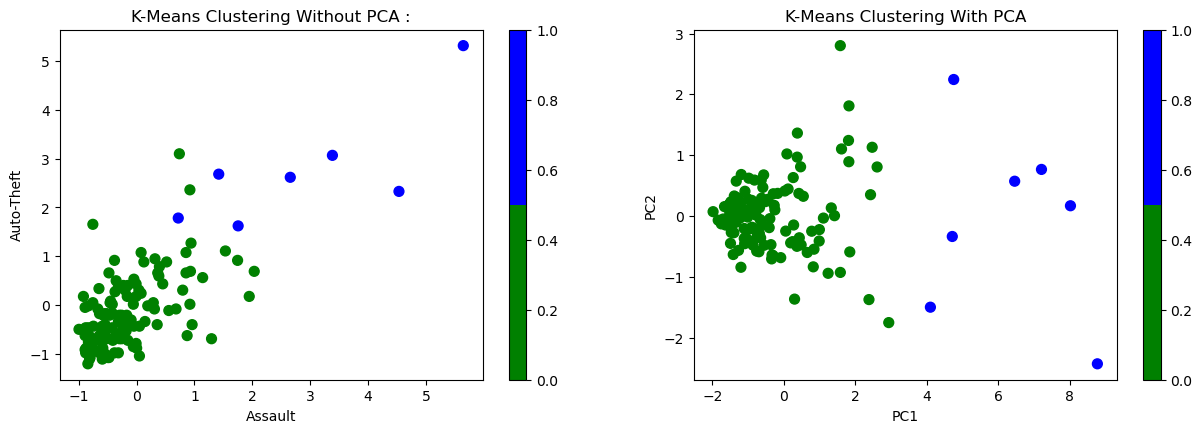

/var/folders/xl/2kbx04jd4bsf8f37wlplqdy40000gn/T/ipykernel_49948/3885442204.py:94: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/var/folders/xl/2kbx04jd4bsf8f37wlplqdy40000gn/T/ipykernel_49948/3885442204.py:111: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


running time is : 0.002309791001607664


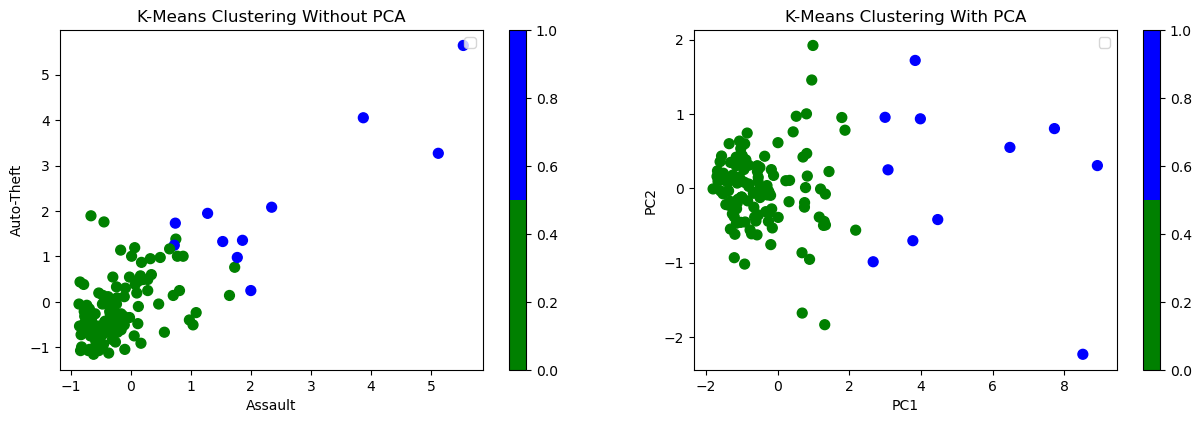

/var/folders/xl/2kbx04jd4bsf8f37wlplqdy40000gn/T/ipykernel_49948/3885442204.py:113: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


In [44]:
#Plotting the cluster obtained using GMM
kmeans = KMeans(n_clusters=2,random_state=3425)
colors = ['green','blue']


plt.figure(figsize=(15, 5)) 

ax = plt.subplot(121)
kc =kmeans.fit(df_transformed0)
label = pd.DataFrame(kc.labels_)
df_result =pd.DataFrame(df_transformed0)
# label = label.sort_values(by=0)
df_result['label']=label

scatter = plt.scatter(df_result[0],df_result[2],
                     c=list(label.iloc[:,0]), cmap=matplotlib.colors.ListedColormap(colors),s=50)
plt.title('K-Means Clustering Without PCA')
plt.xlabel('Assault')
plt.ylabel('Auto-Theft')
plt.colorbar(scatter)


ax = plt.subplot(122)
start = timeit.default_timer()
kc =kmeans.fit(X0)
stop = timeit.default_timer()
klabel0 = pd.DataFrame(kc.labels_)
df_result =pd.DataFrame(X0)
# klabel0 = klabel0.sort_values(by=0)
df_result['label']=klabel0
scatter = plt.scatter(df_result[0],df_result[2],
                      c = list(klabel0.iloc[:,0]), cmap=matplotlib.colors.ListedColormap(colors),s=50)
plt.title('K-Means Clustering With PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(scatter)
print("running time is :",stop-start)
plt.show()


colors = ['green','blue']
#Plotting the cluster obtained using GMM
kmeans = KMeans(n_clusters=2,random_state=342)
plt.figure(figsize=(15, 10)) 

ax = plt.subplot(221)

kc =kmeans.fit(df_transformed)

label = pd.DataFrame(kc.labels_)
df_result =pd.DataFrame(df_transformed)
label.sort_values(by=0)
df_result['label']=label
scatter = plt.scatter(df_result[0],df_result[2],
                       c = list(label.iloc[:,0]), cmap= matplotlib.colors.ListedColormap(colors),s=50)
plt.title('K-Means Clustering Without PCA :')
plt.xlabel('Assault')
plt.ylabel('Auto-Theft')
plt.colorbar(scatter)

ax = plt.subplot(222)
start = timeit.default_timer()
kc =kmeans.fit(X)
stop = timeit.default_timer()
klabel1 = pd.DataFrame(kc.labels_)
df_result =pd.DataFrame(X)
klabel1.sort_values(by=0)
df_result['label']=klabel1
scatter = plt.scatter(df_result[0],df_result[2],
                      c = list(klabel1.iloc[:,0]), cmap= matplotlib.colors.ListedColormap(colors),s=50)
plt.title('K-Means Clustering With PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(scatter)
print("running time is :",stop-start)
plt.show()


#Plotting the cluster obtained using GMM
kmeans = KMeans(n_clusters=2,random_state=342)
plt.figure(figsize=(15, 15)) 
ax = plt.subplot(321)
kc =kmeans.fit(df_transformed2)
label = pd.DataFrame(kc.labels_)
df_result =pd.DataFrame(df_transformed2)
label.sort_values(by=0)
df_result['label']=label
scatter = plt.scatter(df_result[0],df_result[2],
                      c = list(label.iloc[:,0]), cmap= matplotlib.colors.ListedColormap(colors),s=50)
plt.title('K-Means Clustering Without PCA')
plt.xlabel('Assault')
plt.ylabel('Auto-Theft')
plt.colorbar(scatter)
ax.legend()

ax = plt.subplot(322)
start = timeit.default_timer()
kc =kmeans.fit(X1)
stop = timeit.default_timer()
klabel2 = pd.DataFrame(kc.labels_)
df_result =pd.DataFrame(X1)
klabel2.sort_values(by=0)
df_result['label']=klabel2
scatter = plt.scatter(df_result[0],df_result[2],
                      c = list(klabel2.iloc[:,0]), cmap= matplotlib.colors.ListedColormap(colors),s=50)
plt.title('K-Means Clustering With PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(scatter)
print("running time is :",stop-start)
ax.legend()
plt.show()
ax.legend()

In [72]:
X_list = [X0, X, X1]
year_list = [2015,2016,2017]
for i,y in zip(X_list,year_list):
    from sklearn import metrics
    clustering = KMeans(n_clusters=2,random_state=3425).fit(i)
    labels = clustering.labels_
    print("Silhouette score(K-means) for year",y,"is",metrics.silhouette_score(i, labels, metric='euclidean'))

Silhouette score(K-means) for year 2015 is 0.7307306081429716
Silhouette score(K-means) for year 2016 is 0.7516165973715112
Silhouette score(K-means) for year 2017 is 0.8128068146265719


In [73]:
neighborhoods0 = df_g0.index
neighborhoods0 = np.array(neighborhoods0)

neighborhoods = df_g.index
neighborhoods = np.array(neighborhoods)

neighborhoods2 = df_g2.index
neighborhoods2 = np.array(neighborhoods2)
#Display Neighboorhoods
print('Crime Neighborhoods by K-Means in 2015')
print(neighborhoods0[np.where(klabel0[0]==1)])
kviolent15 = neighborhoods0[np.where(klabel0[0]==1)]
kviolent15s = neighborhoods0[np.where(klabel0[0]==0)]
kviolent15m = neighborhoods0[np.where(klabel0[0]==2)]

print('Crime Neighborhoods by K-Means in 2016')
print(neighborhoods[np.where(klabel1[0]==1)])
kviolent16 = neighborhoods[np.where(klabel1[0]==1)]
kviolent16s = neighborhoods[np.where(klabel1[0]==0)]
kviolent16m = neighborhoods[np.where(klabel1[0]==2)]


print('Crime Neighborhoods by K-Means in 2017')
print(neighborhoods2[np.where(klabel2[0]==1)])
kviolent17 = neighborhoods2[np.where(klabel2[0]==1)]
kviolent17s = neighborhoods2[np.where(klabel2[0]==0)]
kviolent17m = neighborhoods2[np.where(klabel2[0]==2)]

Crime Neighborhoods by K-Means in 2015
['Bay Street Corridor (76)' 'Church-Yonge Corridor (75)'
 'Downsview-Roding-CFB (26)' 'Islington-City Centre West (14)'
 'Kensington-Chinatown (78)' 'Moss Park (73)'
 'Waterfront Communities-The Island (77)' 'West Humber-Clairville (1)'
 'Woburn (137)' 'York University Heights (27)']
Crime Neighborhoods by K-Means in 2016
['Bay Street Corridor (76)' 'Church-Yonge Corridor (75)'
 'Islington-City Centre West (14)' 'Moss Park (73)'
 'Waterfront Communities-The Island (77)' 'West Humber-Clairville (1)'
 'York University Heights (27)']
Crime Neighborhoods by K-Means in 2017
['Annex (95)' 'Bay Street Corridor (76)' 'Church-Yonge Corridor (75)'
 'Downsview-Roding-CFB (26)' 'Islington-City Centre West (14)'
 'Kensington-Chinatown (78)' 'Moss Park (73)'
 'Waterfront Communities-The Island (77)' 'West Humber-Clairville (1)'
 'Woburn (137)' 'York University Heights (27)']


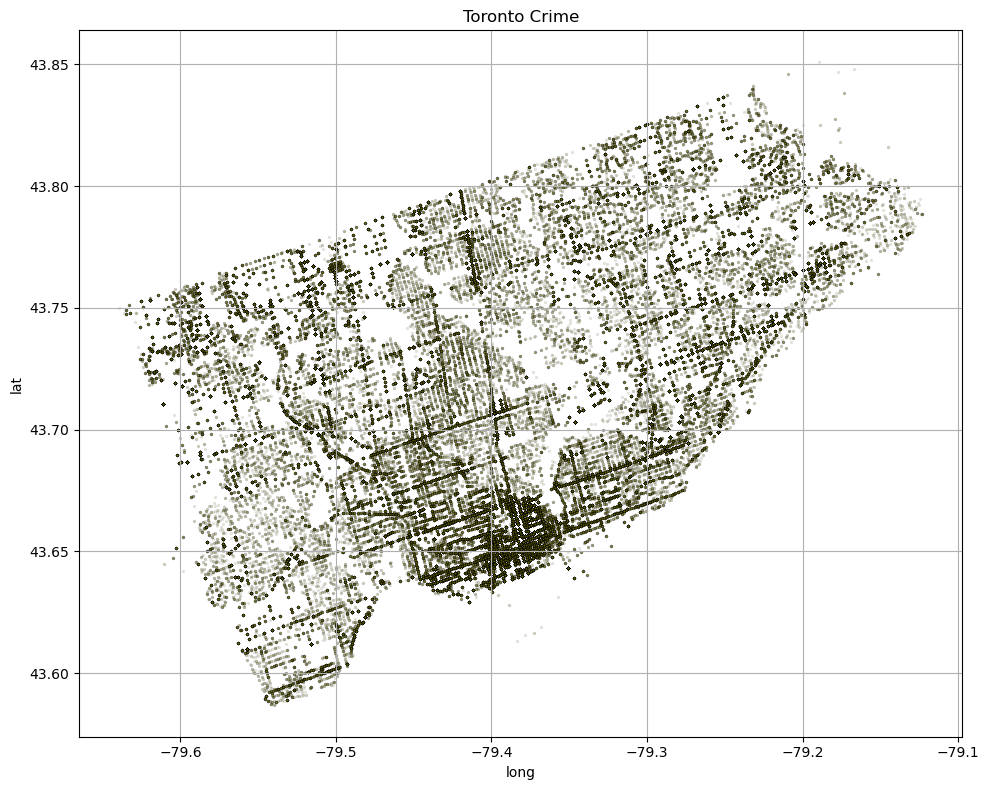

In [74]:
plt.figure(num=None, figsize=(10, 8))
plt.scatter("Long", "Lat", data = df, c = 'y',alpha = 0.1, edgecolor = 'black', s=2)
plt.grid()
plt.xlabel('long')
plt.ylabel('lat')
plt.title('Toronto Crime')
plt.tight_layout()
plt.axis('tight')

plt.show()